In [409]:
%reset -sf

In [410]:
# LOAD THIS BEFORE START, run rmdl

#!/usr/bin/env python3
import sys
import math, random
import functools, itertools, collections, heapq, bisect
from collections import Counter, defaultdict, deque

# import numpy as np
import scipy
import matplotlib.pyplot as plt

abc = "abcdefghijklmnopqrstuvwxyz"
abc_map = {c:i for i,c in enumerate(abc)}
M9 = 10**9 + 7  # 998244353
yes, no = "YES", "NO"
d4 = [(1,0),(0,1),(-1,0),(0,-1)]
d8 = [
    (-1,-1),(-1,0),(-1,1),
    (0,-1),(0,0),(0,1),
    (1,-1),(1,0),(1,1)]
d6 = [(2,0),(1,1),(-1,1),(-2,0),(-1,-1),(1,-1)]  # hexagonal layout
MAXINT = sys.maxsize

In [430]:
with open("/Users/htong/Downloads/input.txt") as f:
    srr = f.read().strip().split("\n")

In [412]:
srr = """
R 6 (#70c710)
D 5 (#0dc571)
L 2 (#5713f0)
D 2 (#d2c081)
R 2 (#59c680)
D 2 (#411b91)
L 5 (#8ceee2)
U 2 (#caa173)
L 1 (#1b58a2)
U 2 (#caa171)
R 2 (#7807d2)
U 3 (#a77fa3)
L 2 (#015232)
U 2 (#7a21e3)
""".strip().split("\n")

In [431]:
mapping = {"0": "R", "1": "D", "2": "L", "3": "U"}

In [432]:
arr = [row.split() for row in srr]
arr = [(a,int(b),int(c[2:-2], 16), mapping[c[-2]]) for a,b,c in arr]

In [433]:
d4 = [(1,0),(0,1),(-1,0),(0,-1)]
d44 = {
    "D": (1,0),
    "U": (-1,0),
    "L": (0,-1),
    "R": (0,1),
}

In [434]:
pts = [[0,0]]
all_pts = []
for a,b,c,d in arr:
    a,b = d,c
    x,y = pts[-1]
    dx,dy = d44[a]
    x += dx * b
    y += dy * b    
    pts.append([x, y])

In [435]:
# pts

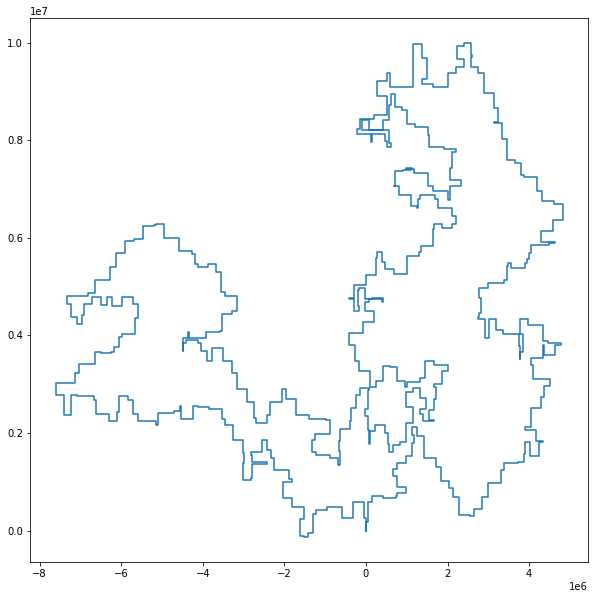

In [436]:
# from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.plot([x for x,y in pts], [y for x,y in pts])

In [437]:
def shoelace_formula(xs, ys):
    # https://stackoverflow.com/a/30950874/5894029
    return sum(xs[i] * ys[i - 1] - xs[i - 1] * ys[i] for i in range(len(xs))) / 2

In [438]:
area = shoelace_formula([x for x,y in pts], [y for x,y in pts])
area

40654855702372.0

In [439]:
interior = area + 1 - sum(c for a,b,c,d in arr) // 2
interior

40654792963498.0

In [440]:
sum(c for a,b,c,d in arr) + interior

40654918441248.0